<a href="https://colab.research.google.com/github/MuskanThakur-13/Chronometer/blob/main/spam__Ham_mails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Spam Classifier in Python

In [2]:
import pandas as pd
from sklearn import metrics
import numpy as np


In [3]:
from google.colab import files
files=files.upload()

Saving spam_ham.csv to spam_ham.csv


In [4]:
mail_messages=pd.read_csv('spam_ham.csv')

In [5]:
mail_messages.head()


,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
mail_messages=mail_messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [7]:
mail_messages.rename(columns = {'label':'Label', 'message':'Message'}, inplace = True)

In [8]:
mail_messages.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
mail_messages['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

<Axes: >

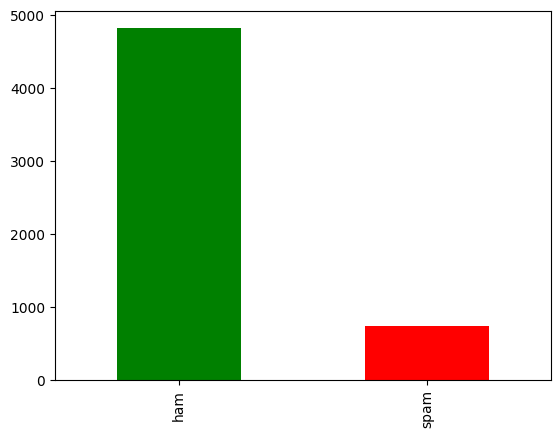

In [10]:

mail_messages['Label'].value_counts().plot.bar(color = ["g","r"])

In [11]:
mail_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
#Data cleaning and preprocessing
# STEMMING/

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(mail_messages)):
    review = re.sub('[^a-zA-Z]', ' ', mail_messages['Message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5572)
X = cv.fit_transform(corpus).toarray()


y=pd.get_dummies(mail_messages['Label'])   # converting the labels,spam or ham as 0 or 1
y=y.iloc[:,1].values
print(y)

[0 0 1 ... 0 0 0]


In [14]:
#Data cleaning and preprocessing
# LEMMATIZATION
# import re
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords
# lemmatizer = WordNetLemmatizer()
# corpus = []
# for i in range(0, len(mail_messages)):
#     review = re.sub('[^a-zA-Z]', ' ', mail_messages['Message'][i])
#     review = review.lower()
#     review = review.split()

#     review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
#     review = ' '.join(review)
#     corpus.append(review)

In [15]:
# Creating the TF IDF(Term frequency and Inverse document frequency) model
# from sklearn.feature_extraction.text import TfidfVectorizer
# cv = TfidfVectorizer(max_features=5572)
# X = cv.fit_transform(corpus).toarray()


# y=pd.get_dummies(mail_messages['Label'])   # converting the labels,spam or ham as 0 or 1
# y=y.iloc[:,1].values


In [16]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
print(f"Rows in X train set: {len(X_train)}\nRows in X test set: {len(X_test)}\nRows in Y train set: {len(y_train)}\nRows in Y test set: {len(y_test)}\n")


Rows in X train set: 4457
Rows in X test set: 1115
Rows in Y train set: 4457
Rows in Y test set: 1115



In [17]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [18]:
#Using Confusion matrix and Evaluating the accuracy
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test, y_pred)


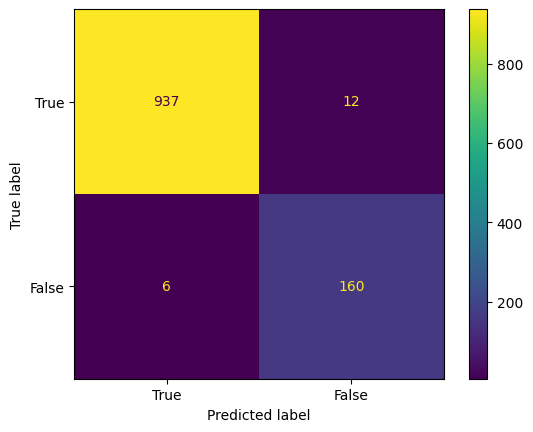

In [19]:
# plotting the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_m,display_labels = [True, False])
disp.plot()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9838565022421525


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.93      0.96      0.95       166

    accuracy                           0.98      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [22]:
#Errors with Naive Bayes classifier
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,1.382960
MSE,0.016143
RMSE,0.127057


In [23]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
y_pred = model_RFR.predict(X_test)

In [24]:
# Errors with Random Forest Classifier
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,0.038924
MSE,0.020735
RMSE,0.143998
